In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [8]:
data = pd.read_csv(r'/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/aapl.us.txt')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     8364 non-null   object 
 1   Open     8364 non-null   float64
 2   High     8364 non-null   float64
 3   Low      8364 non-null   float64
 4   Close    8364 non-null   float64
 5   Volume   8364 non-null   int64  
 6   OpenInt  8364 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 457.5+ KB


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8364 non-null   datetime64[ns]
 1   Open     8364 non-null   float64       
 2   High     8364 non-null   float64       
 3   Low      8364 non-null   float64       
 4   Close    8364 non-null   float64       
 5   Volume   8364 non-null   int64         
 6   OpenInt  8364 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 457.5 KB


In [12]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [21]:
data = data.sort_values(by = 'Date')

In [27]:
data = data.set_index('Date')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Close'>

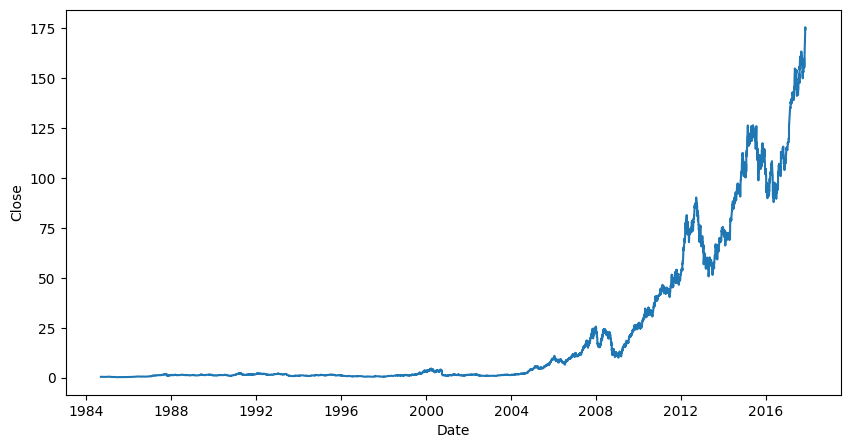

In [29]:
plt.figure(figsize = (10 , 5))
sns.lineplot(data , x = data.index , y = 'Close')

In [47]:
# check wheather Close is stationary or non stationary
result_original = adfuller(data['Close'])

print(f'ADF Statistic(Original) : {result_original[0]:.4f}')
print(f'p-value(Original) : {result_original[1]:.4f}')

if result_original[1] < 0.05:
    print('Interpretation : The Origianl Series is Stationary ')
else :
    print('Interpretation : The Original Series is non-Stationary')

# Apply First order differencing
data['close_diff'] = data['Close'].diff()
data = data.dropna()

result_diff = adfuller(data['close_diff'])
print(f'ADF Statistic(Diff) : {result_diff[0]:.4f}')
print(f'p-value(Diff) : {result_diff[1]:.4f}')

if result_diff[1]< 0.05:
    print('Interpretation : The differencing Series is Stationary ')
else :
    print('Interpretation : The differencing Series is non-Stationary')

ADF Statistic(Original) : 4.3735
p-value(Original) : 1.0000
Interpretation : The Original Series is non-Stationary
ADF Statistic(Diff) : -14.9410
p-value(Diff) : 0.0000
Interpretation : The differencing Series is Stationary 


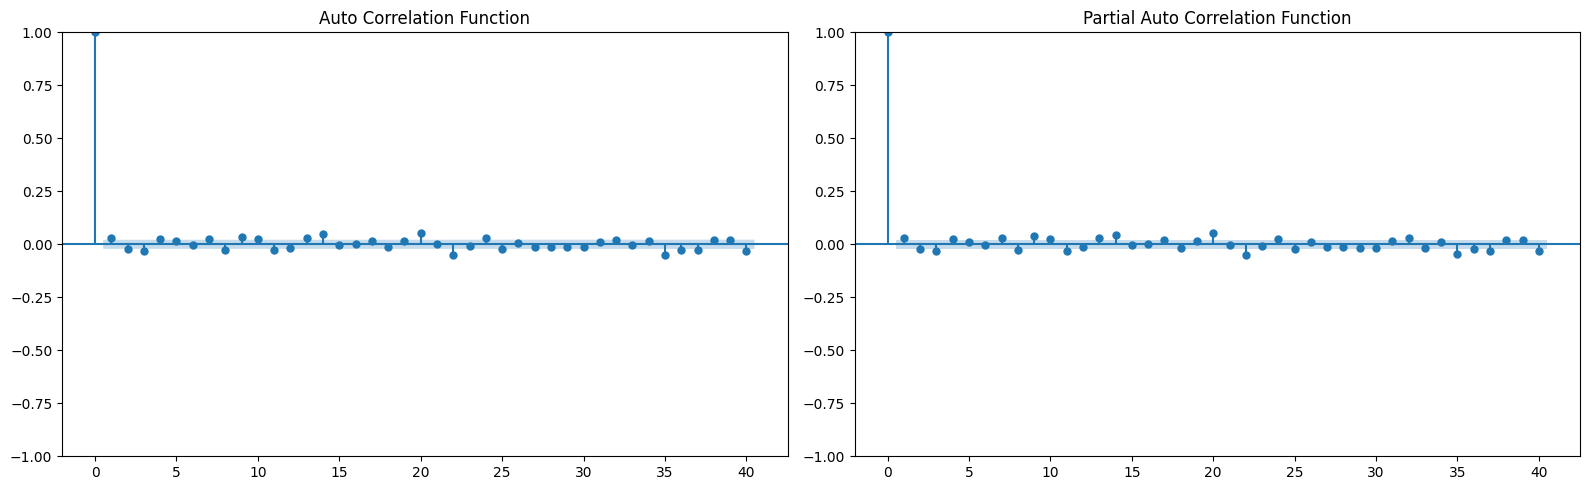

In [75]:
fig , axes = plt.subplots(1 , 2 , figsize = (16 , 5))
#acf Plot (Auto Correlation function)
plot_acf(data['close_diff'] , lags = 40 , ax = axes[0])
axes[0].set_title('Auto Correlation Function')
#PACF Plot (Partial Auto Correlation Function)
plot_pacf(data['close_diff'] , lags = 40 , ax = axes[1])
axes[1].set_title('Partial Auto Correlation Function')
plt.tight_layout()
plt.show()

In [60]:
# Split Train Test data
train_size = int(len(data)*0.9)
train , test = data.iloc[:train_size] , data.iloc[train_size:]


In [68]:
# Fit ARIMA model
model = ARIMA(train['Close'] ,order = [1,1,1]) # p,d,q
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


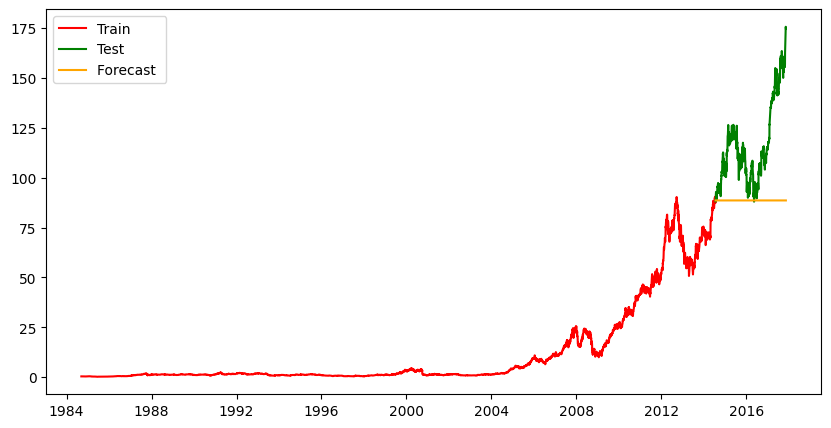

In [76]:
forecast = model_fit.forecast(steps = len(test))

plt.figure(figsize = (10 , 5))
plt.plot(train.index , train['Close'] , label = 'Train' , color = 'red')
plt.plot(test.index ,test['Close'] , label = 'Test' , color = 'green')
plt.plot(test.index ,forecast , label = 'Forecast ' , color = 'orange')
plt.legend()

In [70]:
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")

AIC: 8452.659310932417
BIC: 8473.43687050368


In [73]:
forecast # Forcasted Value
test_close = test['Close'][:len(forecast)] #Original Value

#Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_close , forecast))
rmse

34.91664457682809